In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
data=pd.read_csv("dataset.csv",sep=";")

In [71]:
resultado=pd.Categorical(data["estado"])
data["outcome"]=resultado.codes

In [92]:
df=data[["exitosos","final","outcome","e0","e1","e2","e3","e4","e6","e7","e8","e9","e10","e11","e12","e13","e17","e18"]]

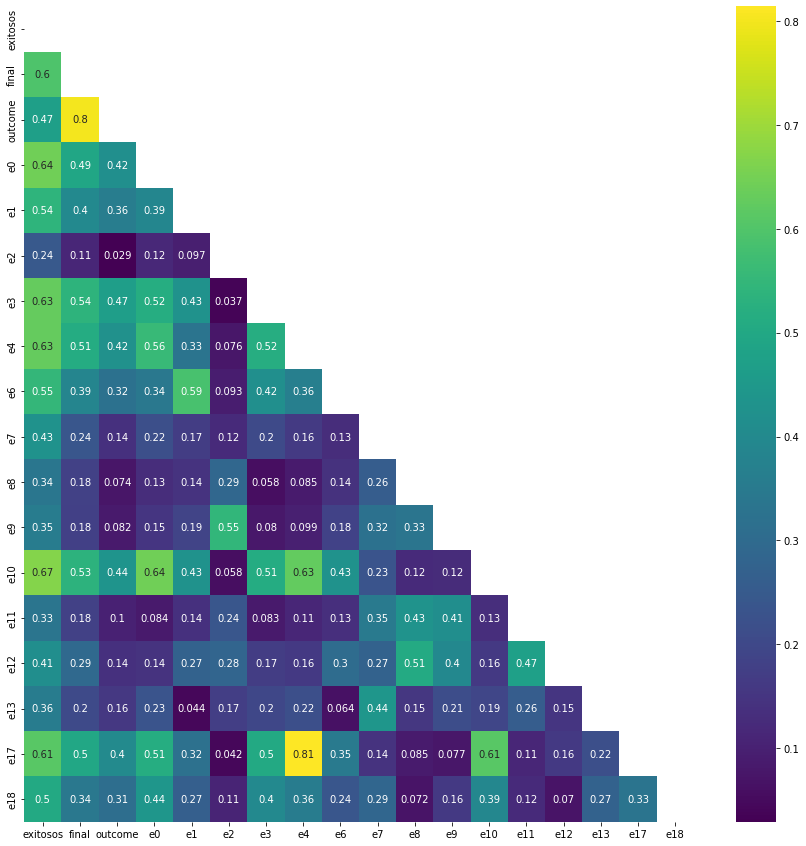

In [91]:
plt.figure(figsize=(15, 15))
corr = df.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True, cmap='viridis');

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

In [99]:
X=data[["e0","e1","e2","e3","e4","e6","e7","e8","e9","e10","e11","e12","e13","e17","e18","e21","e22","e23","e25","e26","e28","e29","e31","e32","e33","e35","e37","e38","e42","e44","e48"]]
Y=df[["outcome"]]

In [100]:
X=data[["e0","e1","e2","e3","e4","e6","e7","e8","e9","e10"]]
Y=df[["outcome"]]

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = BernoulliNB()
clf = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('Classes: ', clf.classes_)
print('Class Log Priors: ',clf.class_log_prior_)
score = model.score(X_test, Y_test)
print('Accuracy Score: ', score)
print(classification_report(Y_test, Y_pred))

Classes:  [0 1]
Class Log Priors:  [-0.11043743 -2.25801677]
Accuracy Score:  0.925531914893617
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        84
           1       0.64      0.70      0.67        10

    accuracy                           0.93        94
   macro avg       0.80      0.83      0.81        94
weighted avg       0.93      0.93      0.93        94



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de Confusión:
[[80  4]
 [ 3  7]]


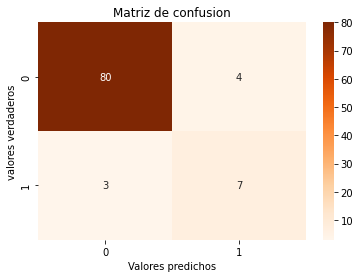

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

matriz = confusion_matrix(Y_test, Y_pred)
print('Matriz de Confusión:')
print(matriz)
ax= plt.subplot()
sb.heatmap(matriz, annot=True, ax = ax, cmap="Oranges",fmt="d");
ax.set_xlabel('Valores predichos');ax.set_ylabel('valores verdaderos'); 
ax.set_title('Matriz de confusion'); 

In [103]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = clf.predict_proba(X) 
probs = probs[:, 1]  
auc = roc_auc_score(Y, probs)  
print('AUC: %.2f' % auc) 

AUC: 0.90
